In [1]:
import numpy as np
np.set_printoptions(threshold=10000)
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import IsolationForest

## Loading data

In [17]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [3]:
directory_path = 'data/raw/timeseries/'

In [4]:
data = pd.read_csv(f'{directory_path}aapl.csv', index_col=4, parse_dates=True); data.shape

(2516, 4)

## Extracting anomalies from timeseries

In [5]:
series = data[data.asset == "AAPL"][["close"]]
series.head(3)

,close
datetime,
2012-03-26 15:30:00,21.678
2012-03-27 15:30:00,21.946
2012-03-28 15:30:00,22.058


### First tweak - contamination = .02

In [6]:
X=series.iloc[:,0].values.reshape((-1,1))
IF=IsolationForest(n_estimators=1000,random_state=1,contamination=0.02)
IF.fit(X)
anomalie=IF.predict(X)
anomalie[anomalie==1]=0
anomalie[anomalie==-1]=1

In [7]:
series['anomalie'] = anomalie
series.head(3)

,close,anomalie
datetime,,
2012-03-26 15:30:00,21.678,0
2012-03-27 15:30:00,21.946,0
2012-03-28 15:30:00,22.058,0


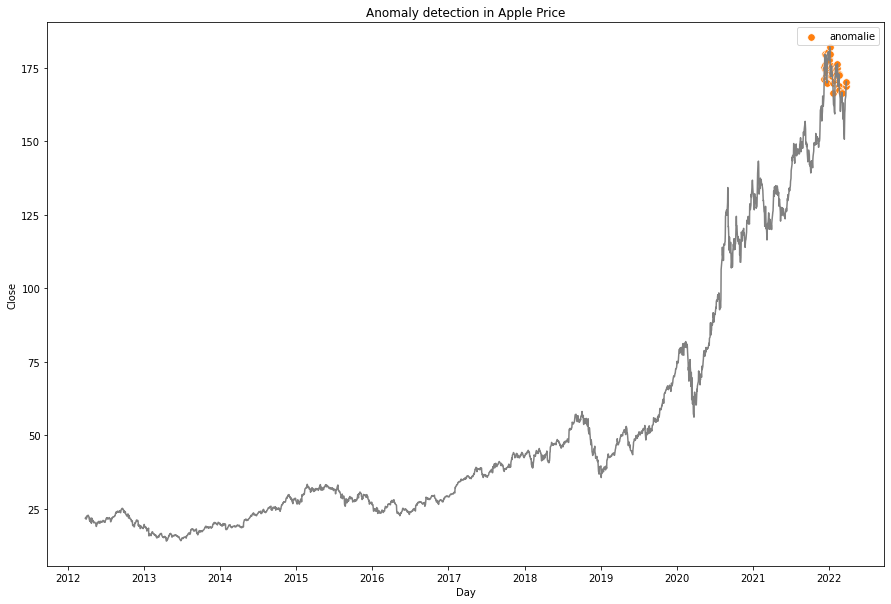

In [8]:
anomalies=series[series.anomalie==1]

plt.figure(figsize =(15,10))
plt.plot(series.index,series.close,color='gray')
sns.scatterplot(anomalies.index,anomalies.close,
                color=sns.color_palette()[1],
                s=55,
                label='anomalie')
plt.title('Anomaly detection in Apple Price')
plt.xlabel('Day')
plt.ylabel('Close')
plt.show()

### Let's try to generalize - contamination = .05

In [9]:
X=series.iloc[:,0].values.reshape((-1,1))
IF=IsolationForest(n_estimators=1000,random_state=1,contamination=0.05)
IF.fit(X)
anomalie=IF.predict(X)
anomalie[anomalie==1]=0
anomalie[anomalie==-1]=1

In [10]:
series['anomalie'] = anomalie
series.head(3)

,close,anomalie
datetime,,
2012-03-26 15:30:00,21.678,0
2012-03-27 15:30:00,21.946,0
2012-03-28 15:30:00,22.058,0


APPLE price visualization:


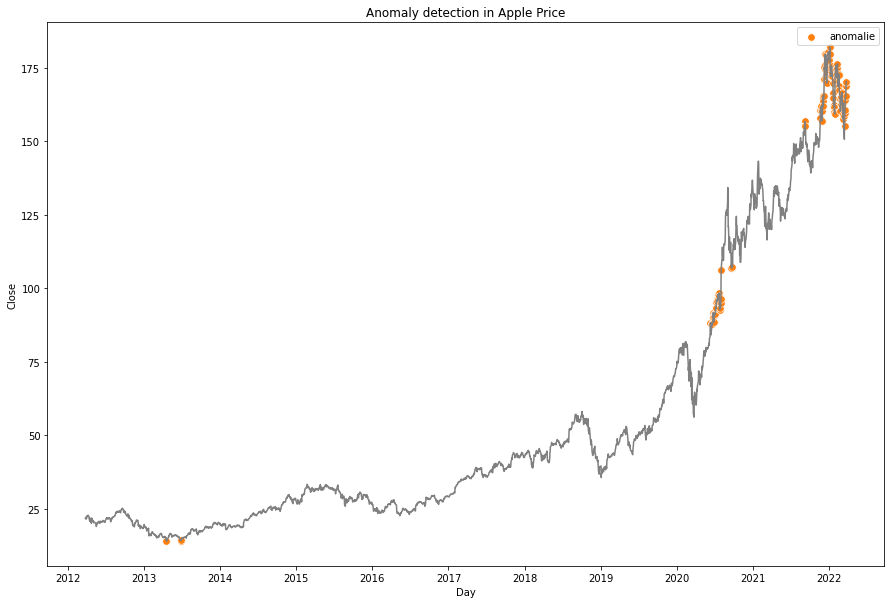

In [11]:
anomalies=series[series.anomalie==1]

print('APPLE price visualization:')
plt.figure(figsize =(15,10))
plt.plot(series.index,series.close,color='gray')
sns.scatterplot(anomalies.index,anomalies.close,
                color=sns.color_palette()[1],
                s=55,
                label='anomalie')
plt.title('Anomaly detection in Apple Price')
plt.xlabel('Day')
plt.ylabel('Close')
plt.show()

### Let's try to generalize - contamination = .1

In [12]:
X=series.iloc[:,0].values.reshape((-1,1))
IF=IsolationForest(n_estimators=1000,random_state=1,contamination=0.1)
IF.fit(X)
anomalie=IF.predict(X)
anomalie[anomalie==1]=0
anomalie[anomalie==-1]=1

In [13]:
series['anomalie'] = anomalie
series.head(3)

,close,anomalie
datetime,,
2012-03-26 15:30:00,21.678,0
2012-03-27 15:30:00,21.946,0
2012-03-28 15:30:00,22.058,0


APPLE price visualization:


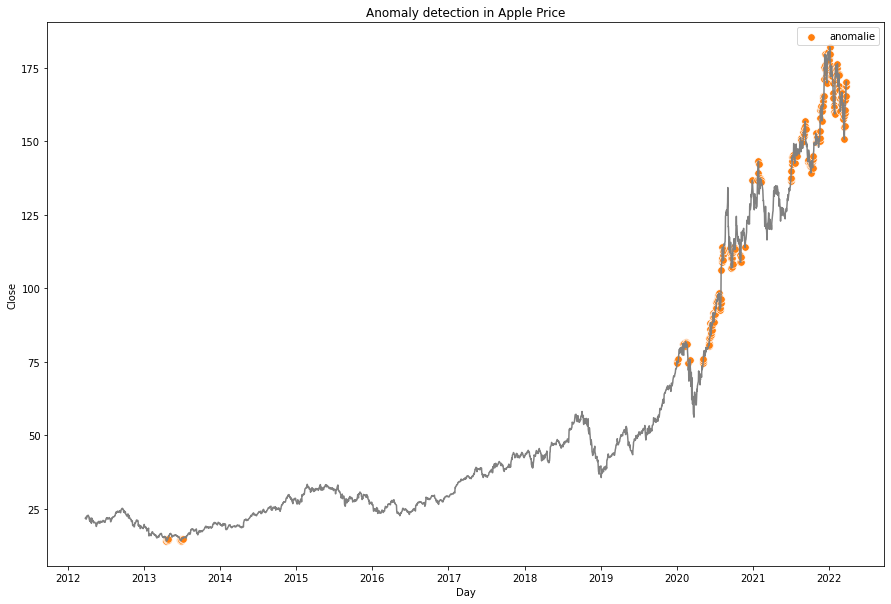

In [14]:
anomalies=series[series.anomalie==1]

print('APPLE price visualization:')
plt.figure(figsize =(15,10))
plt.plot(series.index,series.close,color='gray')
sns.scatterplot(anomalies.index,anomalies.close,
                color=sns.color_palette()[1],
                s=55,
                label='anomalie')
plt.title('Anomaly detection in Apple Price')
plt.xlabel('Day')
plt.ylabel('Close')
plt.show()

In [18]:
df_with_anomalies = series[series.anomalie == 1]; display_all(df_with_anomalies)

,close,anomalie
datetime,,
2013-04-17 15:30:00,14.386,1
2013-04-18 15:30:00,14.002,1
2013-04-19 15:30:00,13.948,1
2013-04-22 15:30:00,14.238,1
2013-04-23 15:30:00,14.505,1
2013-04-24 15:30:00,14.481,1
2013-04-25 15:30:00,14.585,1
2013-06-21 15:30:00,14.768,1
2013-06-24 15:30:00,14.376,1


## Trying to discover what's behind those anomalies

1.  2013-04 → 2013-07 - price stay pretty stable
    1. chinese media pounded the company for it's warranty policies
    2. apple release it's financial results -> profit shrank year-over-year for the first time
    3. rumors about new design went viral on the internet
2.  2020-01 → 2020-02 - price drop
    1. apple release it's financial results -> profit grow year-over-year
3.  2020-05 → 2021-02 - price went up
    1. a virus decide to attack earth and pause everything (covid)
4.  2021-06 → now - price wen up
    1. Apple's WWDC21 went out -> iOS15 & more of everything (drive+, privacy+,xcode cloud)

Not sure analysis over news (NLP) could anticipate those...